In [22]:
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset,Dataset, DataLoader
import torch.utils.data as data_utils
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import tqdm

In [23]:
df=pd.read_csv("heart.csv")

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
feature_columns = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target_column = 'target'

In [26]:
train, test = train_test_split(df, test_size=0.2)

In [27]:
X = np.array(df[feature_columns])
# Extract target
y = np.array(df[target_column])

# encode target with target_mapping
y = np.array(df[target_column])

In [28]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X = np.array((X - X_mean)/X_std)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [30]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [31]:
batch_size = 16

In [35]:
dataset =TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size, shuffle = False)

In [36]:
testset =TensorDataset(X_test, y_test)
test_loader = DataLoader(testset, batch_size, shuffle = False)

In [37]:
#Write your own model and correct mistakes if they are
torch.manual_seed(42) 
np.random.seed(42)
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
    
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epoch = 100

In [38]:
train_losses = []
test_losses = []
for i in range(num_epoch):
    model.train(True)
    epoch_train_losses = []
    
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss.item())              
    train_losses.append(np.mean(epoch_train_losses))
    model.train(False)
    with torch.no_grad():
        #add code for validation set
        epoch_test_losses = []
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred.squeeze().squeeze(), y_batch.squeeze())
            epoch_test_losses.append(loss.item())
            if i%20 == 0:
                print(i, 'train loss ',np.mean(epoch_train_losses), ' val loss ', np.mean(epoch_test_losses))
        test_losses.append(np.mean(epoch_test_losses))

0 train loss  0.5989426520581429  val loss  0.46011027693748474
0 train loss  0.5989426520581429  val loss  0.47188007831573486
0 train loss  0.5989426520581429  val loss  0.4143424332141876
0 train loss  0.5989426520581429  val loss  0.3920978084206581
0 train loss  0.5989426520581429  val loss  0.4428958594799042
0 train loss  0.5989426520581429  val loss  0.4320424348115921
0 train loss  0.5989426520581429  val loss  0.3927326670714787
0 train loss  0.5989426520581429  val loss  0.367690009996295
0 train loss  0.5989426520581429  val loss  0.37901804016696083
0 train loss  0.5989426520581429  val loss  0.35421810746192933
0 train loss  0.5989426520581429  val loss  0.34132625433531677
0 train loss  0.5989426520581429  val loss  0.3543206565082073
0 train loss  0.5989426520581429  val loss  0.3437404850354561
20 train loss  0.10069252681345321  val loss  0.12848114967346191
20 train loss  0.10069252681345321  val loss  0.08278512209653854
20 train loss  0.10069252681345321  val loss 

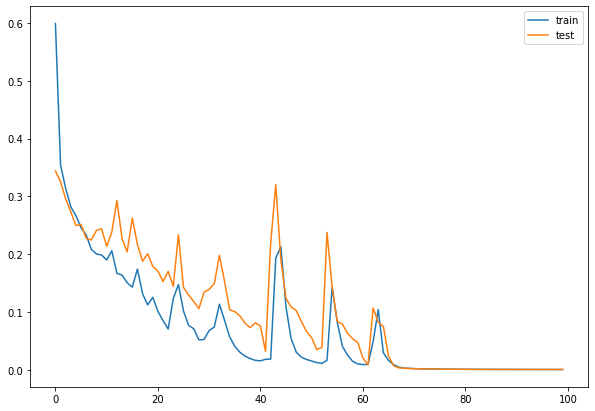

In [39]:
#print both train and test losses on one graph 
plt.figure(figsize=(10,7))
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()
plt.show()

In [51]:
y_pred = model.forward(X_test)

In [52]:
y_pred = np.round(y_pred.detach().numpy())

In [53]:
#show your results 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106   0]
 [  0  99]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       106
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

